<h1>Taxi Price Prediction</h1>

Team members :-<br>
Aditya Shukla 181383<br>
Astitva Shrestha 181404<br>
Mohak Goel 181388<br>
Navdeep Singh Hada 181405<br>

# Foreword

The aim of this project was to perfrom and presnet a data sceince project from an academic perspective. A breif overview of the various techniques used in this project have been included in the report. Latex has been used for mathematical notations where needed. Due to the academic nature of the project, the graphs too have been properly designed and labeled. Due to the categorical nature of the attributes, decided to focus mainly on decision tree based algorithms. The models have been carefully tested using various techniques described below to prevent any overfit or underfit. 

## Importing Dependencies and Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data IO

In [ ]:
df = pd.read_excel("taxi NYC.xlsx")
df.head()

,Unnamed: 0,Unnamed: 0.1,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,diff,DayOfWeekNum,DayOfWeek,MonthNum,MonthDayNum
0,NaN,0,2,2019-07-09 12:32:24,2019-07-09 12:47:41,1.0,1.34,1,N,238,236,2.0,10.0,0.0,0.5,0.0,0.0,0.3,10.8,0.010613,1.0,Tuesday,7.0,9.0
1,NaN,1,2,2019-07-03 12:32:24,2019-07-03 12:47:41,1.0,1.34,1,N,238,236,2.0,10.0,0.0,0.5,0.0,0.0,0.3,10.8,0.010613,2.0,Wednesday,7.0,3.0
2,NaN,2,2,2019-07-16 12:25:53,2019-07-16 12:29:00,1.0,0.32,1,N,238,238,2.0,4.0,0.0,0.5,0.0,0.0,0.3,4.8,0.002164,1.0,Tuesday,7.0,16.0
3,NaN,3,2,2019-07-25 12:25:53,2019-07-25 12:29:00,1.0,0.32,1,N,238,238,2.0,4.0,0.0,0.5,0.0,0.0,0.3,4.8,0.002164,3.0,Thursday,7.0,25.0
4,NaN,4,2,2019-08-20 12:08:33,2019-08-20 12:22:24,1.0,1.85,1,N,236,238,2.0,10.0,0.0,0.5,0.0,0.0,0.3,10.8,0.009618,1.0,Tuesday,8.0,20.0


## Pre-Processing

In [ ]:
df.drop(labels = df.columns[0:2], axis = 1, inplace= True)

In [ ]:
df = df.sample(frac=1, axis=0, random_state=0).reset_index(drop=True)
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,diff,DayOfWeekNum,DayOfWeek,MonthNum,MonthDayNum
0,1,2019-08-31 23:56:25,2019-09-01 00:01:03,2.0,0.6,1,N,142,143,1.0,5.0,0.5,0.5,1.25,0.0,0.3,7.55,0.003218,5.0,Saturday,8.0,31.0
1,1,2019-07-06 23:50:21,2019-07-07 00:02:11,1.0,2.7,1,N,151,244,2.0,12.0,0.5,0.5,0.00,0.0,0.3,13.30,0.008218,5.0,Saturday,7.0,6.0
2,1,2019-08-25 23:55:07,2019-08-26 00:06:37,2.0,2.8,1,N,234,231,2.0,11.0,0.5,0.5,0.00,0.0,0.3,12.30,0.007986,6.0,Sunday,8.0,25.0
3,2,2019-07-15 23:52:18,2019-07-16 00:04:03,1.0,3.1,1,N,166,263,1.0,12.0,0.5,0.5,2.66,0.0,0.3,15.96,0.008160,0.0,Monday,7.0,15.0
4,1,2019-07-13 23:57:19,2019-07-14 00:08:24,1.0,NaN,1,N,234,141,1.0,10.5,0.5,0.5,2.35,0.0,0.3,14.15,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

vendorid                   0
tpep_pickup_datetime       0
tpep_dropoff_datetime      0
passenger_count           30
trip_distance             21
ratecodeid                 0
store_and_fwd_flag         0
pulocationid               0
dolocationid               0
payment_type              51
fare_amount                0
extra                      0
mta_tax                    0
tip_amount                 0
tolls_amount               0
improvement_surcharge      0
total_amount               0
diff                     100
DayOfWeekNum             100
DayOfWeek                100
MonthNum                 100
MonthDayNum              100
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
pick = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
drop = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')
                          
diff = drop - pick
total_time = []
for i in diff:
    total_time.append(i.total_seconds()/3600)
    
df['fare_time_in_hours'] = total_time
df.head()

,vendorid,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,ratecodeid,store_and_fwd_flag,pulocationid,dolocationid,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,diff,DayOfWeekNum,DayOfWeek,MonthNum,MonthDayNum,fare_time_in_hours
0,1,2019-08-31 23:56:25,2019-09-01 00:01:03,2.0,0.60,1,N,142,143,1.0,5.0,0.5,0.5,1.25,0.0,0.3,7.55,0.003218,5.0,Saturday,8.0,31.0,0.077222
1,1,2019-07-06 23:50:21,2019-07-07 00:02:11,1.0,2.70,1,N,151,244,2.0,12.0,0.5,0.5,0.00,0.0,0.3,13.30,0.008218,5.0,Saturday,7.0,6.0,0.197222
2,1,2019-08-25 23:55:07,2019-08-26 00:06:37,2.0,2.80,1,N,234,231,2.0,11.0,0.5,0.5,0.00,0.0,0.3,12.30,0.007986,6.0,Sunday,8.0,25.0,0.191667
3,2,2019-07-15 23:52:18,2019-07-16 00:04:03,1.0,3.10,1,N,166,263,1.0,12.0,0.5,0.5,2.66,0.0,0.3,15.96,0.008160,0.0,Monday,7.0,15.0,0.195833
4,2,2019-08-05 23:58:11,2019-08-06 00:34:42,1.0,8.57,1,N,68,225,1.0,30.0,0.5,0.5,6.26,0.0,0.3,37.56,0.025359,0.0,Monday,8.0,5.0,0.608611


## Visualizations

Several different plotting techniques have been used to understand the structre of data. All of the plots are self explanatory.

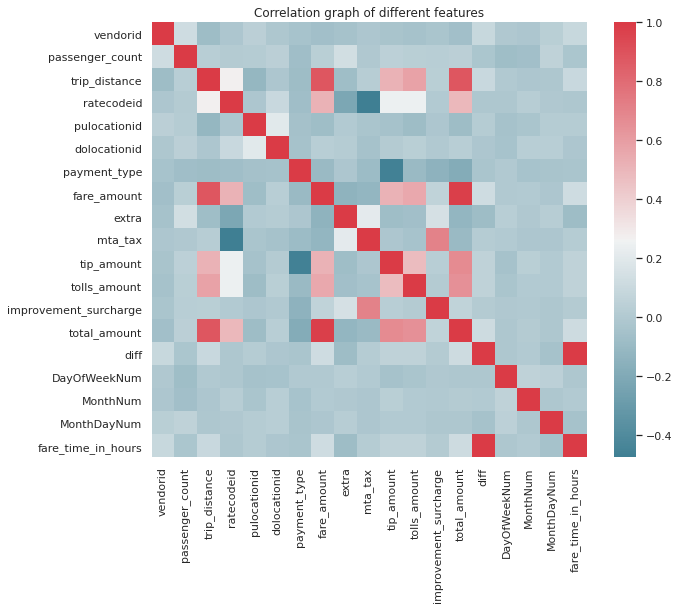

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
_ = plt.title("Correlation graph of different features")

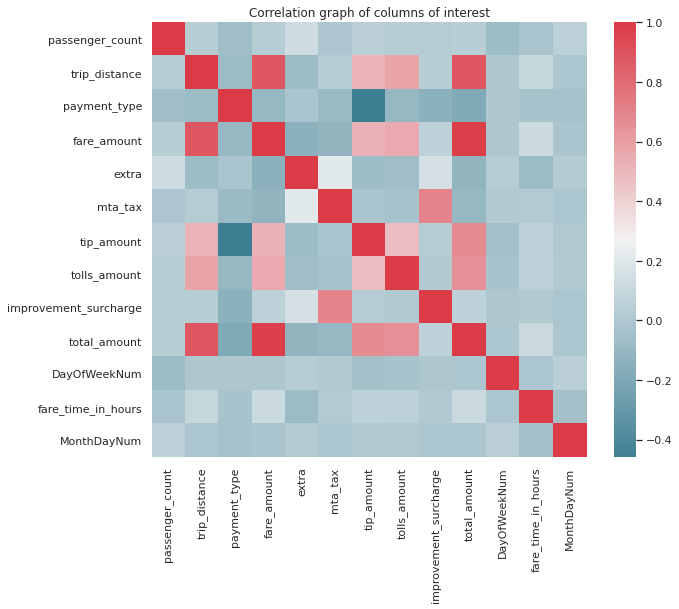

In [ ]:
f, ax = plt.subplots(figsize=(10, 8))
corr = df[COI].corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
_ = plt.title("Correlation graph of columns of interest")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8890248c50>]],
      dtype=object)

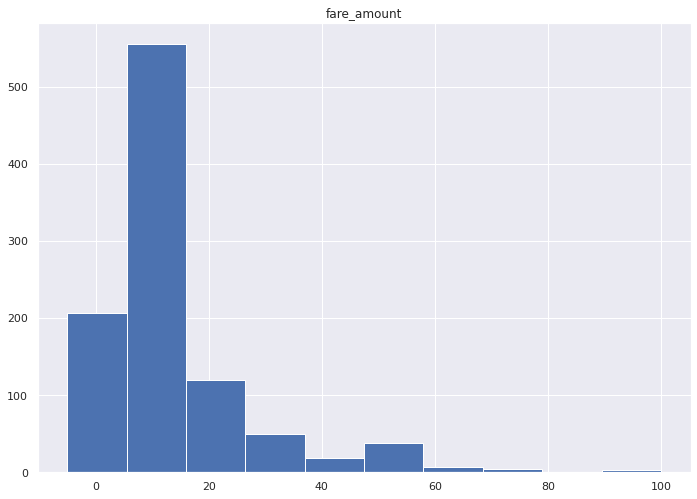

In [ ]:
df[["fare_amount"]].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f88901a7908>]],
      dtype=object)

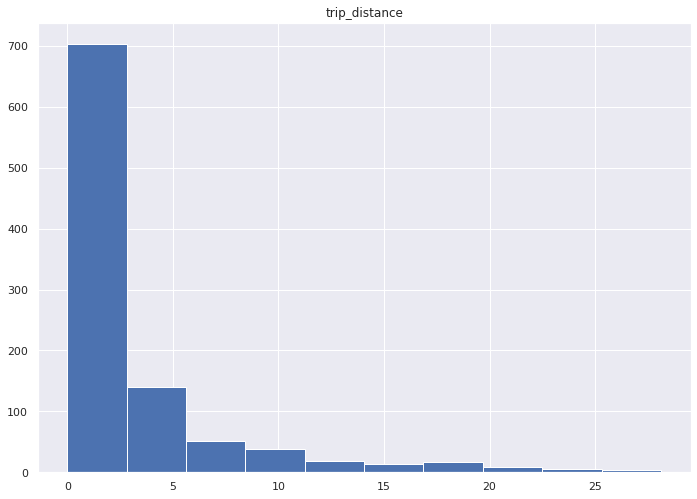

In [ ]:
df[["trip_distance"]].hist()

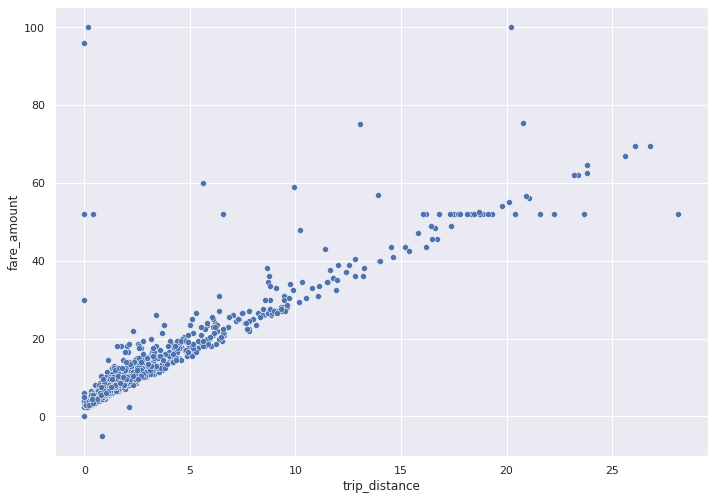

In [ ]:
sns.scatterplot(x="trip_distance", y="fare_amount", data=df)

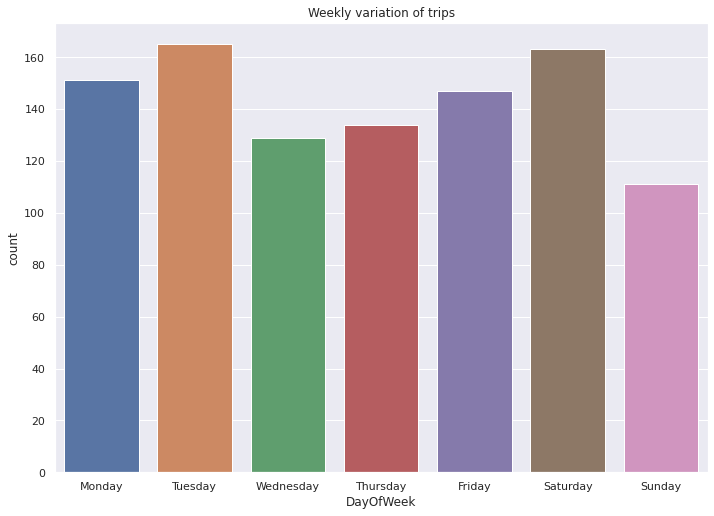

In [ ]:
sns.countplot(x ='DayOfWeek', data = df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = plt.title("Weekly variation of trips")

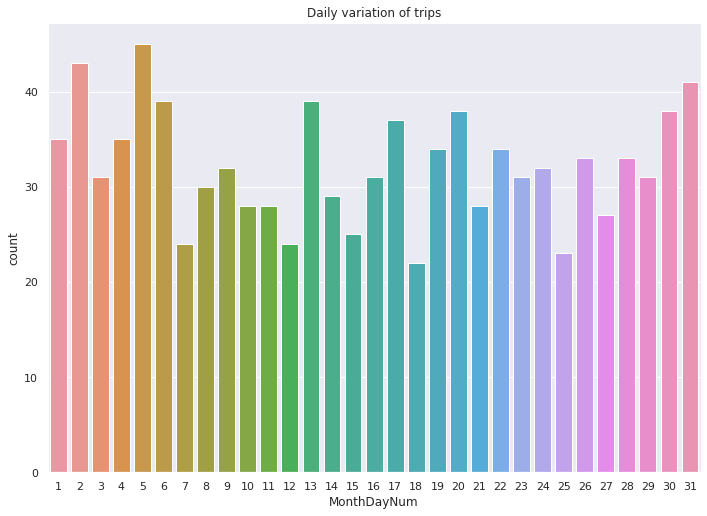

In [ ]:
df["MonthDayNum"] = df["MonthDayNum"].astype('int')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x ="MonthDayNum", data = df)
_ = plt.title("Daily variation of trips")

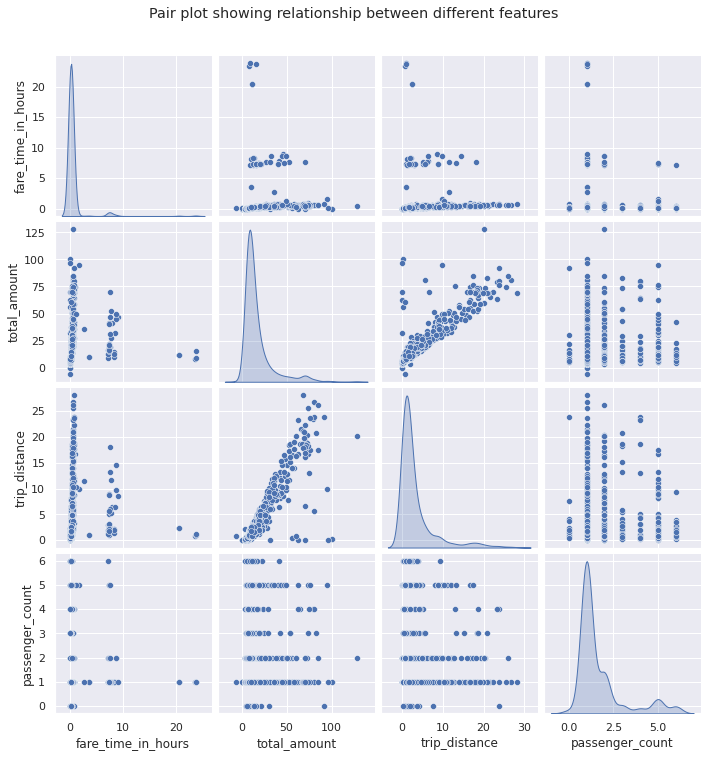

In [ ]:
g = sns.pairplot(df.loc[:,['fare_time_in_hours', 'total_amount', 'trip_distance', 'passenger_count']], diag_kind='kde')
_ = g.fig.suptitle("Pair plot showing relationship between different features", y=1.05)

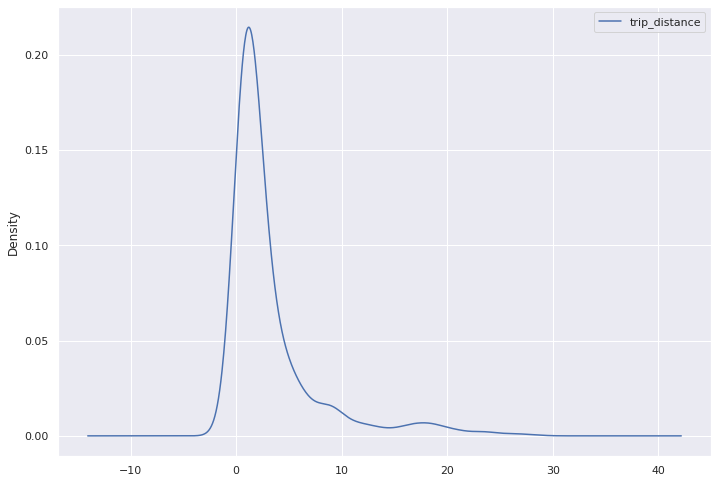

In [ ]:
df2[['trip_distance']].plot.kde()

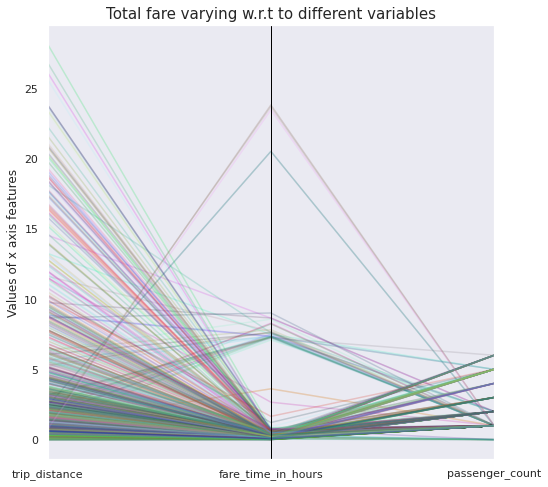

In [ ]:
plt.figure(figsize=(8,8))
pd.plotting.parallel_coordinates(df2,class_column='total_amount', cols=['trip_distance','fare_time_in_hours','passenger_count'], alpha=0.2)
plt.gca().legend_.remove()
plt.ylabel('Values of x axis features')
_=plt.title('Total fare varying w.r.t to different variables',size=15)

## Model

<h3>Columns of Interest:</h3>

1.   Passenger Count
2.   Trip Distance
3.   Payment Type
4.   Fare Amount
5.   Extra
6.   MTA Tax
7.   Tip Amount
8.   Tolls Amount
9.   Imporvement Surcharge
10.  Total Amount
11.  Day Of Week Num
12.  Fare time in hours
13.  Month Day Num

In [ ]:
df.columns

Index(['vendorid', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'ratecodeid', 'store_and_fwd_flag',
       'pulocationid', 'dolocationid', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'diff', 'DayOfWeekNum', 'DayOfWeek', 'MonthNum',
       'MonthDayNum', 'fare_time_in_hours'],
      dtype='object')

In [ ]:
COI = [
       'passenger_count', 'trip_distance', 'payment_type', 'fare_amount', 
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
       'improvement_surcharge', 'total_amount', 'DayOfWeekNum','fare_time_in_hours',
       'MonthDayNum'
       ]

<h3>Importing Dependencies and Library for Model

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import GridSearchCV

<h3>Creating & Splitting data to train and test</h3>

In [ ]:
x_cols = [c for c in df.columns if c not in ['fare_amount', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag',
                                             'total_amount', 'diff', 'DayOfWeek', 'MonthNum',]]
                                            # 'extra',	'mta_tax',	'tip_amount',	'tolls_amount',	'improvement_surcharge']]
X = df.loc[:, x_cols]
y = df['fare_amount']

X_train, X_test, y_train,  y_test = train_test_split(X,y, test_size=0.1, random_state=0)

<h1>Hyperparameter Tuning with GridSearchCV</h1>

In almost any Machine Learning project, we train different models on the dataset and selecting the one with the best performance. However, there is almost a room for improvement as we cannot say for sure that this particular model is best for the problem at hand, hence our aim is to improve the model in any way possible. One important factor in the performances of these models are their hyperparameters, once we set appropriate values for these hyperparameters, the performance of a model can improve significantly. Optimal values for the hyperparameters of a model can be found by using GridSearchCV.

**GridSearchCV**

It is the process of performing hyperparameter tuning in order to determine the optimal values for a given model. As mentioned above, the performance of a model significantly depends on the value of hyperparameters. Note that there is no way to know in advance the best values for hyperparameters so ideally, we need to try all possible values to know the optimal values. Doing this manually could take a considerable amount of time and resources and thus we use GridSearchCV to automate the tuning of hyperparameters.

GridSearchCV is a function that comes in Scikit-learn’s(or SK-learn) model_selection package.So an important point here to note is that we need to have Scikit-learn library installed on the computer. This function helps to loop through predefined hyperparameters and fit your estimator (model) on your training set. So, in the end, we can select the best parameters from the listed hyperparameters.

**GridSearchCV working**

As mentioned above, we pass predefined values for hyperparameters to the GridSearchCV function. We do this by defining a dictionary in which we mention a particular hyperparameter along with the values it can take. Here is an example of it

> { 'C': [0.1, 1, 10, 100, 1000],<br>
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001], <br>
            'kernel': ['rbf',’linear’,'sigmoid']  }


Here C, gamma and kernels are some of the hyperparameters of an SVM model. Note that the rest of the hyperparameters will be set to their default values

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

**Using GridSearchCV**

Let us see what are the various arguments that are taken by GridSearchCV function:


> **sklearn.model_selection.GridSearchCV(estimator, param_grid,scoring=None,
          n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, 
          pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)**


We are going to briefly describe a few of these parameters and rest you can see on the original documentation:



> 1. *estimator*: Pass the model instance for which you want to check the hyperparameters.<br>
2. *params_grid*: the dictionary object that holds the hyperparameters you want to try.<br>
3. *scoring*: evaluation metric that you want to use, you can simply pass a valid string/ object of evaluation metric.<br>
4. *cv*: number of cross-validation you have to try for each selected set of hyperparameters.<br>
5. *verbose*: you can set it to 1 to get the detailed print out while you fit the data to GridSearchCV.<br>
6. *n_jobs*: number of processes you wish to run in parallel for this task if it -1 it will use all available processors. <br>




In [ ]:
reg = GridSearchCV(XGBRegressor(objective='reg:squarederror', random_state=0), param_grid=
                   {'n_estimators':list(range(500,1000,100)), 'learning_rate':[.001,.01,.1,1],
                    'max_depth':list(range(1,11))}, scoring='r2')

out = reg.fit(X_train,y_train)

print(f"Grid Search Best Score: {out.best_score_}")
print(f"Grid Search Best Parameters: {out.best_params_}")

Grid Search Best Score: 0.9126063116055463
Grid Search Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 900}


All possible combinations of parameters and respective train score are given below.

In [ ]:
d = pd.DataFrame(out.cv_results_)
d.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.117411,0.003318,0.002236,0.000110,0.001,1,500,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.066044,-0.021844,0.093539,-0.068162,-0.000407,0.013834,0.058784,200
1,0.136438,0.002487,0.002330,0.000075,0.001,1,600,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.174494,0.057783,0.206356,0.078438,0.133336,0.130081,0.056027,197
2,0.159777,0.004239,0.002392,0.000018,0.001,1,700,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.264972,0.125075,0.301873,0.203518,0.247192,0.228526,0.060637,188
3,0.181039,0.004826,0.002791,0.000387,0.001,1,800,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.341542,0.182460,0.383195,0.309417,0.342532,0.311829,0.068791,179
4,0.201023,0.002112,0.002720,0.000062,0.001,1,900,"{'learning_rate': 0.001, 'max_depth': 1, 'n_es...",0.407049,0.230716,0.452526,0.400168,0.422585,0.382609,0.078056,169


<h1>XGBoost</h1> Xgboost is an implementation of the gradient tree boosting algorithm that is widely recognized for its efficiency and predictive accuracy.

Gradient tree boosting trains an ensemble of decision trees by training each tree to predict the prediction error of all previous trees in the ensemble:

> <h1><center>$\min_{\nabla f_{t,i}} \sum_i L(f_{t-1,i} + \nabla f_{t,i}; y_i)$,</center></h1>

where $\nabla f_{t,i}$ is the prediction generated by the newest decision tree for sample $i$ and $f_{t-1,i}$ is the prediction generated by all previous trees, $L(...)$ is the loss function used and $y_i$ is the target we are trying to predict.

XGBoost implements this general approach by adding two specific components:

The loss function $L(...)$ is approximated using a Taylor series.

The leaves of the decision tree $\nabla f_{t,i}$ contain weights that can be regularized.

These weights are calculated as follows:

> <h1><center>$w_l = -\frac{\sum_{i \in l} g_i}{ \sum_{i \in l} h_i + \lambda}$,</center></h1>

where $g_i$ and $h_i$ are the first and second order derivative of $L(...)$ w.r.t. $f_{t-1,i}$,   $w_l$ denotes the weight on leaf $l$ and $i \in l$ denotes all samples on that leaf.

$\lambda$ is the regularization parameter reg_lambda. This hyperparameter can be set by the users or the hyperparameter optimization algorithm to avoid overfitting.

In [ ]:
reg = XGBRegressor(learning_rate= 0.09, max_depth= 2, n_estimators=450,random_state=0, objective='reg:squarederror').fit(X_train, y_train)

print("Train accuracy: ",reg.score(X_train, y_train))
print("Test accuracy: ",reg.score(X_test, y_test))

Train accuracy:  0.9967796379846838
Test accuracy:  0.9690394125990196


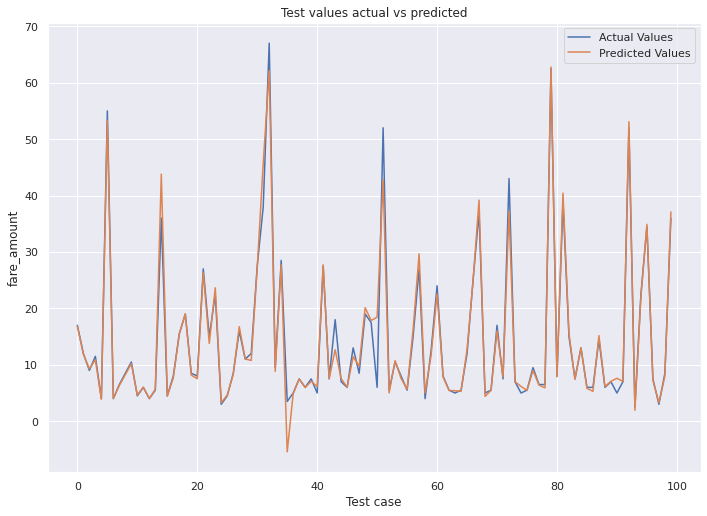

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=list(range(len(y_test))), y=y_test)
sns.lineplot(x=list(range(len(y_test))), y=reg.predict(X_test))
plt.xlabel("Test case")
plt.title("Test values actual vs predicted")
plt.legend(["Actual Values", "Predicted Values"])

# Conclusion

This notebook demonstrates how various conditions affect the overall taxi price. After trying various regression methods including Linear Regression, Decision trees, CAT Boosting, etc. Xgboost gave us the best result with training accuracy of $99.67\%$ and testing accuracy of $96.9\%$. 